In [40]:
import pandas as pd
import seaborn as sns
import math

In [71]:
years = [18,19,20,21]
frames = []
for year in years:
    dfT = pd.read_csv(f'./assets/data/valeursfoncieres-20{year}.txt', sep='|', decimal=',', low_memory=False)
    pop = pd.read_excel('./assets/data/dep_pop.xlsx', sheet_name=f'20'+str(year))
    dfT['Code departement'] = dfT['Code departement'].astype('str').str.pad(2, side='left', fillchar='0')
    frames.append(
        dfT.merge(pop, how='left', left_on='Code departement', right_on='code_departement')
    )
df = pd.concat(frames)
sDF = df.copy()
df.shape

KeyboardInterrupt: 

In [30]:
df['key'] = df['Date mutation'].astype('str') + df['Type de voie'].astype('str') + df['Voie'].astype('str') + df['Code postal'].astype('str')
df = df.groupby('key').filter(lambda x : len(x) == 1)
df.shape

(3720954, 47)

In [ ]:
df["Nature mutation"].info()

In [31]:
df = df[df['Valeur fonciere'] > 1]

In [69]:
df.to_csv("./assets/data/df.csv", sep="|")

In [59]:
df = pd.read_csv(f'../assets/data/df.csv', sep='|', low_memory=False)


In [221]:
dataf= df.copy()
df = dataf.copy()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3561121 entries, 0 to 3676921
Data columns (total 48 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   Identifiant de document     float64
 2   Reference document          float64
 3   1 Articles CGI              float64
 4   2 Articles CGI              float64
 5   3 Articles CGI              float64
 6   4 Articles CGI              float64
 7   5 Articles CGI              float64
 8   No disposition              int64  
 9   Date mutation               object 
 10  Nature mutation             object 
 11  Valeur fonciere             float64
 12  No voie                     float64
 13  B/T/Q                       object 
 14  Type de voie                object 
 15  Code voie                   object 
 16  Voie                        object 
 17  Code postal                 float64
 18  Commune                     object 
 19  Code departement          

In [223]:
df["Nature mutation"].value_counts()

Nature mutation
Vente    3561121
Name: count, dtype: int64

In [224]:
df= df[df["Nature mutation"]=="Vente"]
df.head()

,Unnamed: 0,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,...,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,code_departement,departement,total,key
0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10/01/2018,...,NaN,NaN,NaN,S,NaN,126.0,01,Ain,647634.0,10/01/2018nanPONT D AIN1160.0
1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12/01/2018,...,NaN,NaN,NaN,BT,NaN,197.0,01,Ain,647634.0,12/01/2018nanSOUS LE BOIS GIROUD1250.0
2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,...,NaN,45.0,1.0,NaN,NaN,NaN,01,Ain,647634.0,04/01/2018ALLDE LA PETITE REYSSOUZE1000.0
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11/01/2018,...,NaN,68.0,3.0,NaN,NaN,NaN,01,Ain,647634.0,11/01/2018RUEMOLIERE1000.0
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/01/2018,...,NaN,NaN,NaN,AB,NaN,5093.0,01,Ain,647634.0,17/01/2018nanVACAGNOLE1340.0


In [225]:
df["Nature mutation"].value_counts()

Nature mutation
Vente    3561121
Name: count, dtype: int64

In [226]:
df2 =df[['Surface reelle bati', 'Nombre pieces principales', 'Valeur fonciere', 'total', 'Code departement', 'Type local','Surface terrain']]
df2.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Code departement,Type local,Surface terrain
0,NaN,NaN,3150.0,647634.0,01,NaN,126.0
1,NaN,NaN,2100.0,647634.0,01,NaN,197.0
2,45.0,1.0,67000.0,647634.0,01,Appartement,NaN
3,68.0,3.0,76200.0,647634.0,01,Appartement,NaN
4,NaN,NaN,1000.0,647634.0,01,NaN,5093.0


In [227]:
for col in df2.select_dtypes(exclude='object'):
    q1 = df2[col].quantile(q=0.25)
    q3 = df2[col].quantile(q=0.75)

    IQR = q3 - q1

    borne_inf = q1 - 1.5 * IQR
    borne_sup = q3 + 1.5 * IQR
    df2 = df2[df2[col] < borne_sup]
    df2 = df2[df2[col] > borne_inf]
    df2[col].fillna(df2[col].median(), inplace=True)
df2.shape

(1119203, 7)

#Ne pas oublier: on a surface reelle bati pour App et Maison!
#On a surface terrain pour dependance et local!
#Pour (App et maison) d'une part et (Dépendance et local) d'autre part, on enlève les ventes <= 0
#On a vérifier qu'il n'y pas de ventes qui a à la fois des données "surface reelle bati" ET "surface terrain" <= 0 

In [136]:
#df2[df2["Surface reelle bati"]<=0][df2["Surface terrain"]<=0]

C:\Users\naperez\AppData\Local\Temp\ipykernel_3476\1047992687.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2["Surface reelle bati"]<=0][df2["Surface terrain"]<=0]


,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Code departement,Type local,Surface terrain


In [228]:
#Ne pas oublier de faire pareil pour local et dependance avec surface terrain!
df3= df2[df2["Type local"].isin(["Appartement", "Maison"]) & df2["Surface reelle bati"]>0]
df3["Type local"].value_counts()

Type local
Maison         1067297
Appartement       3227
Name: count, dtype: int64

In [229]:
dft = df3.copy()

In [230]:
#création d'une nouvelle variable "prix au metre carré" dans undf3 qui ne contient que les app et maison:
dft["Prix metre carre"]= df3["Valeur fonciere"]/ df3["Surface reelle bati"]
dft.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Code departement,Type local,Surface terrain,Prix metre carre
5,80.0,3.0,130000.0,647634.0,01,Maison,55.0,1625.000000
6,88.0,4.0,164370.0,647634.0,01,Maison,419.0,1867.840909
9,108.0,5.0,95000.0,647634.0,01,Maison,1036.0,879.629630
17,116.0,4.0,163000.0,647634.0,01,Maison,755.0,1405.172414
20,173.0,4.0,117000.0,647634.0,01,Maison,1225.0,676.300578


In [231]:
dft['Prix metre carre']

5          1625.000000
6          1867.840909
9           879.629630
17         1405.172414
20          676.300578
              ...     
3646221    2983.050847
3646227    4551.020408
3646230    3565.217391
3663559     714.285714
3668314     503.355705
Name: Prix metre carre, Length: 1070524, dtype: float64

In [232]:
prix_carre= dft.groupby(['Code departement'])["Prix metre carre"].mean()
prix_carre = prix_carre.reset_index()

In [233]:
df3 = df3.merge(prix_carre, how= "left", on= "Code departement")
df3.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Code departement,Type local,Surface terrain,Prix metre carre
0,80.0,3.0,130000.0,647634.0,01,Maison,55.0,2144.886604
1,88.0,4.0,164370.0,647634.0,01,Maison,419.0,2144.886604
2,108.0,5.0,95000.0,647634.0,01,Maison,1036.0,2144.886604
3,116.0,4.0,163000.0,647634.0,01,Maison,755.0,2144.886604
4,173.0,4.0,117000.0,647634.0,01,Maison,1225.0,2144.886604


In [199]:
# from sklearn.preprocessing import OneHotEncoder

In [200]:
# enc = OneHotEncoder(sparse= False)
# enc.fit(df3[['Type local']])
# dummies = pd.DataFrame(enc.transform(df3[['Type local']]), columns=enc.categories_)

c:\Users\naperez\Desktop\ML\ml-python\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [201]:
# dummies.head()

,Appartement,Maison
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [202]:
# df3 = df3.merge(dummies, left_index=True, right_index=True)
# df3.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Code departement,Type local,Surface terrain,Prix metre carre,"(Appartement,)","(Maison,)"
0,80.0,3.0,130000.0,647634.0,01,Maison,55.0,2144.886604,0.0,1.0
1,88.0,4.0,164370.0,647634.0,01,Maison,419.0,2144.886604,0.0,1.0
2,108.0,5.0,95000.0,647634.0,01,Maison,1036.0,2144.886604,0.0,1.0
3,116.0,4.0,163000.0,647634.0,01,Maison,755.0,2144.886604,0.0,1.0
4,173.0,4.0,117000.0,647634.0,01,Maison,1225.0,2144.886604,0.0,1.0


In [235]:
df3.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Code departement,Type local,Surface terrain,Prix metre carre
0,80.0,3.0,130000.0,647634.0,01,Maison,55.0,2144.886604
1,88.0,4.0,164370.0,647634.0,01,Maison,419.0,2144.886604
2,108.0,5.0,95000.0,647634.0,01,Maison,1036.0,2144.886604
3,116.0,4.0,163000.0,647634.0,01,Maison,755.0,2144.886604
4,173.0,4.0,117000.0,647634.0,01,Maison,1225.0,2144.886604


In [236]:
df3.drop('Type local', axis=1, inplace=True)

In [238]:
df4 = df3.copy()

In [242]:
df4.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Surface terrain,Prix metre carre
0,80.0,3.0,130000.0,647634.0,55.0,2144.886604
1,88.0,4.0,164370.0,647634.0,419.0,2144.886604
2,108.0,5.0,95000.0,647634.0,1036.0,2144.886604
3,116.0,4.0,163000.0,647634.0,755.0,2144.886604
4,173.0,4.0,117000.0,647634.0,1225.0,2144.886604


In [243]:
df4.drop('Surface terrain', axis=1, inplace=True)


In [244]:
df4.head()

,Surface reelle bati,Nombre pieces principales,Valeur fonciere,total,Prix metre carre
0,80.0,3.0,130000.0,647634.0,2144.886604
1,88.0,4.0,164370.0,647634.0,2144.886604
2,108.0,5.0,95000.0,647634.0,2144.886604
3,116.0,4.0,163000.0,647634.0,2144.886604
4,173.0,4.0,117000.0,647634.0,2144.886604


<Axes: >

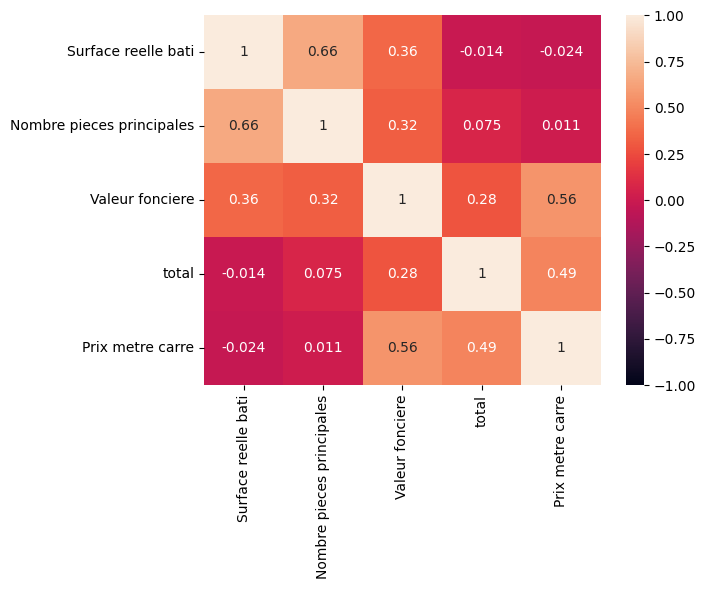

In [245]:
sns.heatmap(df4.corr(), vmax=1, vmin=-1, annot=True)

In [246]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [247]:
target = 'Valeur fonciere'

In [248]:
X = df4.drop(target,  axis=1)
y = df4[target]

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [251]:
scaler.fit(X_train)
X_train_SC= scaler.transform(X_train)
X_train_SC = pd.DataFrame(X_train_SC, columns=X_train.columns)
X_train_SC

,Surface reelle bati,Nombre pieces principales,total,Prix metre carre
0,0.361959,-0.004936,-0.852194,0.317638
1,0.220032,-0.004936,1.756450,1.885667
2,-1.270204,-0.897325,-1.165528,-1.483998
3,-0.383159,0.887452,2.647339,-0.289229
4,0.220032,-0.004936,0.516429,0.415629
...,...,...,...,...
749361,-0.808941,-0.004936,0.210507,0.179589
749362,0.539368,-0.004936,2.647339,-0.289229
749363,-1.376650,-0.897325,-1.191642,-1.530473
749364,-0.560568,-1.789713,-0.428978,-0.415698


In [252]:
model = RandomForestRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=400, n_estimators=150, random_state=0)
model.fit(X_train_SC, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=400,
                      n_estimators=150, random_state=0)

In [253]:
X_test_SC= scaler.transform(X_test)
X_test_SC = pd.DataFrame(X_test_SC, columns=X_test.columns)

In [254]:
y_pred = model.predict(X_test_SC)

In [255]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2Score = r2_score(y_test, y_pred)

In [256]:
mse

5393945961.581707

In [257]:
r2Score

0.47936344143416343

In [258]:
rmse

73443.48821768821

In [37]:
model.feature_names_in_

array(['Surface reelle bati', 'Nombre pieces principales', 'total'],
      dtype=object)

In [39]:
model.feature_importances_

array([0.46182206, 0.01909686, 0.51908107])

In [48]:
import pickle

In [54]:
with open("./assets/models/random-forest-regressor.pkl", "wb") as f:
    pickle.dump({'model': model, 'scaler' : scaler, 'encoder' : enc }, f)